In [99]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Constants
L = 100.0
R_left = np.array([0.0, 0.0])
R_right = np.array([50.0, 00.0])
a = 1.0
b = 1.0

# Function P(r,l) to be integrated over l
def P_r_l(l,r):
    x, y = r
    R = np.array([x, y])
    norm_R_left = np.linalg.norm(R_left - R)
    norm_R_right = np.linalg.norm(R_right - R)
    if norm_R_left > L or norm_R_right>L:
        return 0.
    norm_R_lr = np.linalg.norm(R_left - R_right)

    # Avoid division by zero by adding a small offset from 0 and L
    if l == 0.0:
        l += 1e-10
    elif l == L:
        l -= 1e-10

    term1 = ((3 / (2 * np.pi)) ** (3 / 2)) * ((L * b ** (4 / 3)) / (l * (L - l) * a ** (1 / 3))) ** (3 / 2)
    term2 = np.exp(-3 / 2 * ((norm_R_left ** 2 / (l * a)) + (norm_R_right ** 2 / ((L - l) * a))))
    term3 = np.exp(3 / 2 * (norm_R_lr ** 2 / (L * a)))
    
    return (1 / L) * term1 * term2 * term3



In [100]:
# Limits for the numerical integration (avoiding 0 and L)
epsilon = 1e-5
l_limits = (epsilon, L - epsilon)

# Define grid for r values
a = 1.  # Number of points in the grid
#x = np.linspace(-50, 100, grid_points)
#y = np.linspace(-110,110, grid_points)
x = np.arange(-20, 70, a)
y = np.arange(-20,20, a)

# Create a meshgrid for x and y
X, Y = np.meshgrid(x, y)

# Initialize an array to store the values of P(r)
P_r_values = np.zeros_like(X)

# Perform the numerical integration for each point in the grid
for i in range(P_r_values.shape[0]):
    for j in range(P_r_values.shape[1]):
        r = (X[i, j], Y[i, j])
        P_r_values[i, j], _ = quad(P_r_l, *l_limits, args=(r,))
        #P_r_values[i, j] = P_r_l(100,r)


In [101]:
P_r_values = P_r_values/np.sum(P_r_values)
print(np.sum(P_r_values))

1.0000000000000004


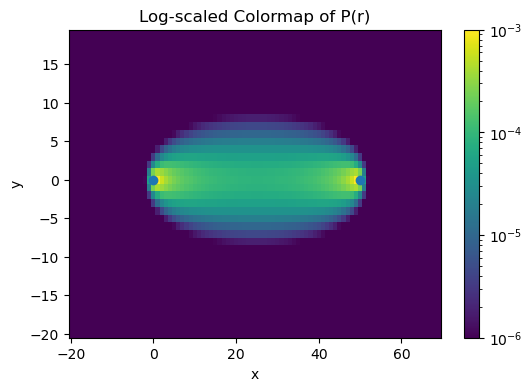

In [107]:
# Plotting the colormap
plt.figure(figsize=(6, 4))
cp = plt.pcolormesh(X, Y, P_r_values, norm=LogNorm(vmin = 10**-6,vmax = 10**-3),shading='auto')
#cp = plt.pcolormesh(X, Y, P_r_values,norm=LogNorm(),shading='auto')
plt.scatter([0.,50.],[0.,0.])
plt.colorbar(cp)
plt.title('Log-scaled Colormap of P(r)')
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim(-10,60)
#plt.ylim(-10,10)
plt.show()